In [65]:
import numpy as np
import pandas as pd
# This library is to visualise statistical graphs
import seaborn as sns

# This library is to visualise graphs
import matplotlib.pyplot as plt

# To set some plotting parameters
from matplotlib import rcParams

# To supplies classes for manipulating dates and times
import datetime

# Library to work with Regular Expressions
import re

# To ignore filterwarnings
import warnings

# This library is to create displays
from IPython.display import Image
from matplotlib import cm
import plotly.express as px
import xgboost as xgb
from sklearn.model_selection import train_test_split

In [3]:
df_trans = pd.read_csv('ieee-fraud-detection/train_transaction.csv')
df_identity = pd.read_csv('ieee-fraud-detection/train_identity.csv')

In [4]:
train = pd.merge(df_trans, df_identity, how='left', 
                 on='TransactionID', left_index=True, 
                right_index=True)

In [ ]:
target = train['isFraud']

In [5]:
def getnulls(data):
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum() / data.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['total', 'precent'])
    return missing_data

In [6]:
missing_data_train = getnulls(train)
missing_data_train.head(100).T

,id_24,id_25,id_07,id_08,id_21,id_26,id_22,id_23,id_27,dist2,...,V229,V254,V269,V253,V252,V231,V232,V249,V248,V247
total,585793.000000,585408.00000,585385.000000,585385.000000,585381.000000,585377.000000,585371.000000,585371.000000,585371.000000,552913.000000,...,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000,460110.000000
precent,0.991962,0.99131,0.991271,0.991271,0.991264,0.991257,0.991247,0.991247,0.991247,0.936284,...,0.779134,0.779134,0.779134,0.779134,0.779134,0.779134,0.779134,0.779134,0.779134,0.779134


In [7]:
# Get the columns that we have to drop
droppedcols = missing_data_train[missing_data_train['total'] > 100000].index
droppedcols

Index(['id_24', 'id_25', 'id_07', 'id_08', 'id_21', 'id_26', 'id_22', 'id_23',
       'id_27', 'dist2',
       ...
       'V43', 'V49', 'V41', 'V40', 'V39', 'V38', 'V37', 'V36', 'V35', 'D4'],
      dtype='object', length=252)

In [8]:
train.drop(droppedcols, axis=1, inplace=True)

We can fill the NA values in some of the columns 

In [12]:
missing_data_train = getnulls(train)
missing_data_train.head(100).T

,P_emaildomain,V89,V75,V77,V78,V79,V80,V81,V82,V83,...,V136,V135,V114,V133,V116,V117,V118,V119,V120,V121
total,94456.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,...,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
precent,0.159949,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,...,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532


In [23]:
train['P_emaildomain'].isnull().value_counts()

False    496084
True      94456
Name: P_emaildomain, dtype: int64

Replace the email domain with gmail.com since it is most frequently used 

In [26]:
train['P_emaildomain'].fillna('gmail.com', inplace=True)

In [30]:
missing_data_train = getnulls(train)
missing_data_train.head(100).T

,V89,V84,V77,V78,V79,V80,V81,V82,V83,V85,...,V135,V117,V118,V119,V120,V121,V122,V123,V124,V125
total,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,...,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000,314.000000
precent,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,...,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532,0.000532


The rest of the remaining columns with na values can be filled using the mean

In [32]:
for i in missing_data_train.T.keys():
    if train[i].dtype == 'object':
        train[i] = train[i].fillna(train[i].mode()[0])

In [34]:
missing_data_train = getnulls(train)
missing_data_train.T

,V89,V84,V77,V78,V79,V80,V81,V82,V83,V85,...,C5,C6,C7,C8,C9,C10,C11,C12,C14,TransactionID
total,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,89164.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,0.150987,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
for i in missing_data_train.T.keys():
    if (i.startswith("C") or (i.startswith("V"))) and train[i].isnull().sum() > 0:
        train[i].fillna(train[i].mode()[0], inplace=True)
        
missing_data_train = getnulls(train)
missing_data_train.T

,D15,D10,addr2,addr1,card2,card5,card3,D1,V59,V65,...,V114,V122,V121,V120,V119,V118,V117,V116,V115,TransactionID
total,89113.000000,76022.000000,65706.000000,65706.000000,8933.000000,4259.000000,1565.00000,1269.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.150901,0.128733,0.111264,0.111264,0.015127,0.007212,0.00265,0.002149,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Fill all the NA values with the most used value in categorical features

In [38]:
for i in missing_data_train.T.keys():
    if train[i].isnull().sum() > 0:
        train[i].fillna(train[i].mode()[0], inplace=True)
        
missing_data_train = getnulls(train)
missing_data_train.T

,V321,V66,V64,V63,V62,V61,V60,V59,V58,V57,...,V114,V122,V121,V120,V119,V118,V117,V116,V115,TransactionID
total,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
precent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
train.drop(['TransactionID'], axis=1, inplace=True)
train.drop(['isFraud'], axis=1, inplace=True)
print(train.shape)

In [55]:
# Encoding the data
all_data = pd.get_dummies(train)

In [56]:
all_data.keys()

Index(['TransactionDT', 'TransactionAmt', 'card1', 'card2', 'card3', 'card5',
       'addr1', 'addr2', 'C1', 'C2',
       ...
       'P_emaildomain_web.de', 'P_emaildomain_windstream.net',
       'P_emaildomain_yahoo.co.jp', 'P_emaildomain_yahoo.co.uk',
       'P_emaildomain_yahoo.com', 'P_emaildomain_yahoo.com.mx',
       'P_emaildomain_yahoo.de', 'P_emaildomain_yahoo.es',
       'P_emaildomain_yahoo.fr', 'P_emaildomain_ymail.com'],
      dtype='object', length=248)

In [57]:
train.keys()

Index(['TransactionDT', 'TransactionAmt', 'ProductCD', 'card1', 'card2',
       'card3', 'card4', 'card5', 'card6', 'addr1',
       ...
       'V312', 'V313', 'V314', 'V315', 'V316', 'V317', 'V318', 'V319', 'V320',
       'V321'],
      dtype='object', length=180)

In [66]:
X_train, X_test, y_train, y_test = train_test_split(all_data, target, test_size=0.2, random_state=42)

In [70]:
xgmodel = xgb.XGBClassifier(colsample_bytree=0.4603, gamma=0.0468, 
                             learning_rate=0.05, max_depth=50, 
                             min_child_weight=1.7817, n_estimators=200,
                             reg_alpha=0.4640, reg_lambda=0.8571,
                             subsample=0.5213, random_state =7, nthread = -1, verbosity = 3)
xgmodel.fit(X_train, y_train)

[04:37:35] DEBUG: ../src/gbm/gbtree.cc:154: Using tree method: 2
[04:37:37] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1302 extra nodes, 14 pruned nodes, max_depth=31
[04:37:37] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[04:37:39] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1136 extra nodes, 20 pruned nodes, max_depth=29
[04:37:40] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1268 extra nodes, 14 pruned nodes, max_depth=25
[04:37:42] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1514 extra nodes, 8 pruned nodes, max_depth=29
[04:37:44] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1502 extra nodes, 6 pruned nodes, max_depth=32
[04:37:45] INFO: ../src/tree/updater_prune.cc:101: tree pruning end, 1290 extra nodes, 16 pruned nod

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.4603, gamma=0.0468,
              gpu_id=-1, importance_type='gain', interaction_constraints='',
              learning_rate=0.05, max_delta_step=0, max_depth=50,
              min_child_weight=1.7817, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, nthread=-1, num_parallel_tree=1,
              random_state=7, reg_alpha=0.464, reg_lambda=0.8571,
              scale_pos_weight=1, subsample=0.5213, tree_method='exact',
              validate_parameters=1, verbosity=3)

In [86]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import itertools

In [87]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

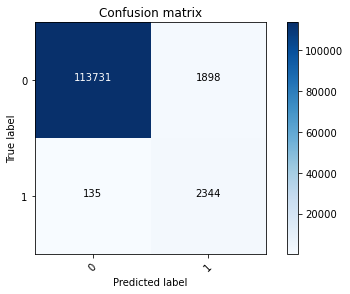

In [88]:
plot_confusion_matrix(confusion_matrix(xgmodel.predict(X_test), y_test), ['0', '1'])

In [79]:
print(classification_report(xgmodel.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99    115629
           1       0.55      0.95      0.70      2479

    accuracy                           0.98    118108
   macro avg       0.78      0.96      0.84    118108
weighted avg       0.99      0.98      0.98    118108



In [73]:
accuracy_score(xgmodel.predict(X_test), y_test)

0.9827869407660785

This looks quite impressive (isn't coz of imbalanced dataset). However, if we use the testing data we do expect less accuracy

In [75]:
def differentcolumns(traincols, testcols):
    for i in traincols:
        if i not in testcols:
            print(i)
            
differentcolumns(all_data.columns, train.columns)

ProductCD_C
ProductCD_H
ProductCD_R
ProductCD_S
ProductCD_W
card4_american express
card4_discover
card4_mastercard
card4_visa
card6_charge card
card6_credit
card6_debit
card6_debit or credit
P_emaildomain_aim.com
P_emaildomain_anonymous.com
P_emaildomain_aol.com
P_emaildomain_att.net
P_emaildomain_bellsouth.net
P_emaildomain_cableone.net
P_emaildomain_centurylink.net
P_emaildomain_cfl.rr.com
P_emaildomain_charter.net
P_emaildomain_comcast.net
P_emaildomain_cox.net
P_emaildomain_earthlink.net
P_emaildomain_embarqmail.com
P_emaildomain_frontier.com
P_emaildomain_frontiernet.net
P_emaildomain_gmail
P_emaildomain_gmail.com
P_emaildomain_gmx.de
P_emaildomain_hotmail.co.uk
P_emaildomain_hotmail.com
P_emaildomain_hotmail.de
P_emaildomain_hotmail.es
P_emaildomain_hotmail.fr
P_emaildomain_icloud.com
P_emaildomain_juno.com
P_emaildomain_live.com
P_emaildomain_live.com.mx
P_emaildomain_live.fr
P_emaildomain_mac.com
P_emaildomain_mail.com
P_emaildomain_me.com
P_emaildomain_msn.com
P_emaildomain_ne

We see that pandas has only tread productCD, card4, card6, P_emaildomain as categorical features. However, there are many more which needs to be accounted in the final model 

In [83]:
from sklearn.metrics import roc_curve, roc_auc_score, f1_score, precision_recall_curve

In [90]:
par = xgmodel.get_params()

The following function splits the training data into a further training and a valuation set, and generates the ROC- and the PR-curve based on the valuation data:

In [91]:
def get_curves(X_, y_, pars):
    X_train, X_val, y_train, y_val = train_test_split(X_, y_, test_size = 0.2)
    clf = xgb.XGBClassifier(**pars)
    clf.fit(X_train, y_train)
    y_prob = clf.predict_proba(X_val)[:,clf.classes_[1]]
    fpr, tpr, thresholds_roc = roc_curve(y_val, y_prob)
    prec, rec, thresholds_pr = precision_recall_curve(y_val, y_prob)
    return fpr, tpr, prec, rec

This function now calls 'get_curves' N_iter times and computes averaged ROC- and PR-curves. I have chosen N_iter = 300, and obtained very smooth ROC-curves. This is important, since we want to use the curves to find the optimal parameters. Too much noise (i.e. not enough smoothing) will likely obfuscate the results.

In [92]:
def gen_curves(X_, y_, pars):
    N_iter = 300
    mean_tpr = 0.0
    mean_fpr = np.linspace(0, 1, 100000)
    
    mean_prec = 0.0
    mean_rec = np.linspace(0, 1, 100000)
    
    for n in range(N_iter):
        fpr, tpr, prec, rec = get_curves(X_, y_, pars)
        prec = list(reversed(prec)) #reverse, otherwise the interp doesn not work
        rec = list(reversed(rec))
        mean_tpr  += np.interp(mean_fpr, fpr, tpr)
        mean_prec += np.interp(mean_rec, rec, prec)

    mean_tpr /= N_iter
    mean_prec /= N_iter
    
    return mean_fpr, mean_tpr, mean_prec, mean_rec

In [93]:
def plot_roc(X_, y_, par, name_par, list_par):
    f, (ax1, ax2) = plt.subplots(1, 2, figsize = (18,7));
    for l in list_par:
        par[name_par] = l
        print(par)
        mean_fpr, mean_tpr, mean_prec, mean_rec = gen_curves(X_, y_, par)
        ax1.plot(mean_fpr, mean_tpr, label = name_par+" = "+str(l))
        ax2.plot(mean_rec, mean_prec, label = name_par+" = "+str(l))
    ax1.set_xlim([0, 0.0005])
    ax1.set_ylim([0.5, 0.95])
    ax1.axvline(2e-4, color='b', linestyle='dashed', linewidth=2)
    ax1.legend(loc="lower right")
    ax1.set_xlabel('FPR/Fallout')
    ax1.set_ylabel('TPR/Recall')
    ax2.set_xlabel('Recall')
    ax2.set_ylabel('Precision')
    ax1.set_title('ROC')
    ax2.set_title('PR')
    ax2.legend(loc = "lower left")
    ax2.set_xlim([0.5, 1])
    plt.show()

In [98]:
par['verbosity'] = 1

In [ ]:
plot_roc(X_train, y_train, par, 'learning_rate', [0.3])

{'objective': 'binary:logistic', 'use_label_encoder': True, 'base_score': 0.5, 'booster': 'gbtree', 'colsample_bylevel': 1, 'colsample_bynode': 1, 'colsample_bytree': 0.4603, 'gamma': 0.0468, 'gpu_id': -1, 'importance_type': 'gain', 'interaction_constraints': '', 'learning_rate': 0.3, 'max_delta_step': 0, 'max_depth': 50, 'min_child_weight': 1.7817, 'missing': nan, 'monotone_constraints': '()', 'n_estimators': 200, 'n_jobs': 8, 'num_parallel_tree': 1, 'random_state': 7, 'reg_alpha': 0.464, 'reg_lambda': 0.8571, 'scale_pos_weight': 1, 'subsample': 0.5213, 'tree_method': 'exact', 'validate_parameters': 1, 'verbosity': 1, 'nthread': -1}


/opt/conda/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[05:52:26] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[05:56:41] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:00:51] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[06:05:04] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old be

I have to terminate the above search since it is taking too long to run. I do not have the computational power to complete this.